In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from matplotlib.pylab import rcParams

rcParams['figure.figsize']=10,6

In [2]:
location='AirPassengers.csv'
df= pd.read_csv(location, encoding='gbk',parse_dates=['Month'],infer_datetime_format=True)
indf=df.set_index(['Month'])

In [3]:
indf.describe()
indf.rename(columns={'#Passengers':'Passengers'},inplace=True)
indf.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


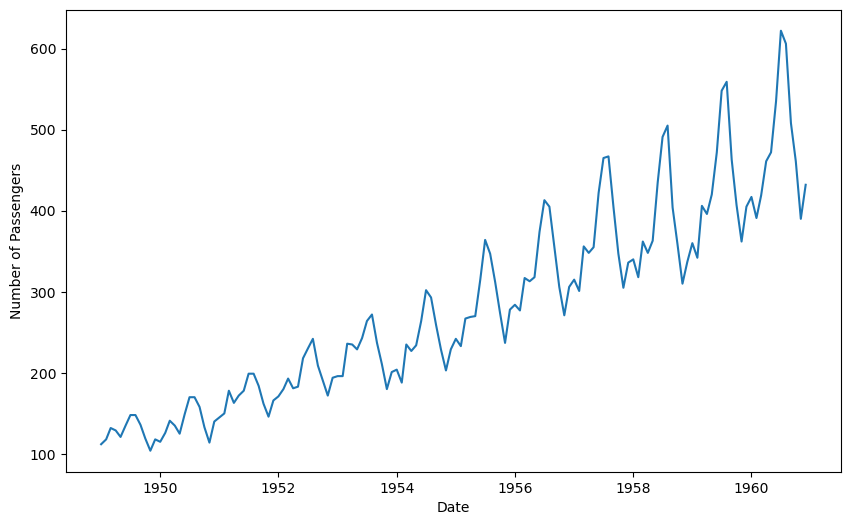

In [4]:
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.plot(indf)

In [5]:

indf['months'] = [x.month for x in indf.index]
indf['years'] = [x.year for x in indf.index]


In [6]:
indf.reset_index(drop=True, inplace=True)

In [7]:
X=indf.drop("Passengers",axis=1)
Y= indf["Passengers"]
X_train=X[:int (len(Y)*0.75)] 
X_test=X[int(len(Y)*0.75):]
Y_train=Y[:int (len(Y)*0.75)] 
Y_test=Y[int(len(Y)*0.75):]


In [8]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

RandomForestRegressor()

Text(0.5, 1.0, 'Forecast of AirPassengers')

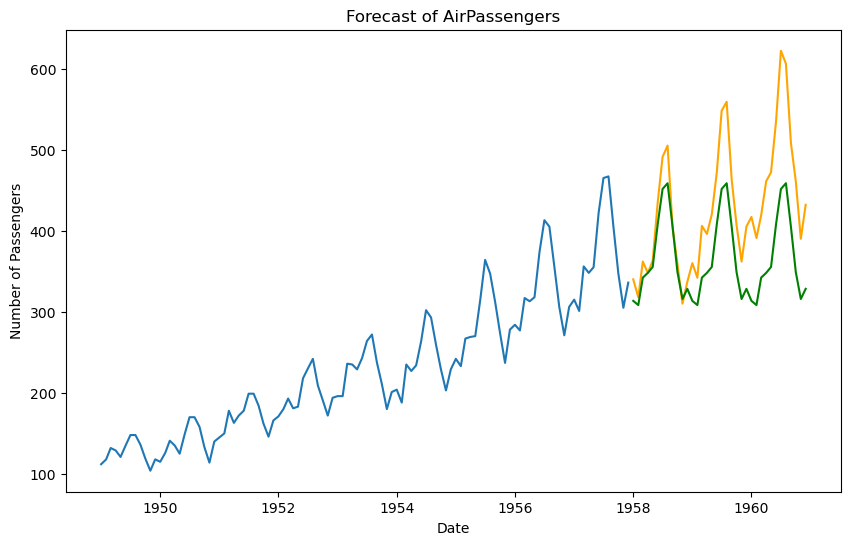

In [9]:
df1=df.set_index(['Month'])
df1.rename(columns={'#Passengers':'Passengers'},inplace=True)
train=df1.Passengers[:int (len(indf.Passengers)*0.75)]
test=df1.Passengers[int(len(indf.Passengers)*0.75):]
preds=rf.predict(X_test)
predictions=pd.DataFrame(preds,columns=['Passengers'])
predictions.index=test.index
plt.plot(train)
plt.plot(test, color='orange', label='actual')
plt.plot(predictions,color='green', label='Forecasts')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title("Forecast of AirPassengers")

In [10]:
rf.score(X_train, Y_train)

0.9952960946406508

In [11]:
rf.score(X_test, Y_test)

0.02703076923076919

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but RandomForestRegressor is expecting 2 features as input.